In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


In [109]:
# Do a shape to get the shape of the dataset

df = pd.read_csv('../data/interim/global_top200_wyear.csv')
df.shape

(2841, 23)

In [110]:
# Examine data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841 entries, 0 to 2840
Data columns (total 23 columns):
stream_count        2841 non-null int64
track_id            2841 non-null object
title               2836 non-null object
artist              2836 non-null object
danceability        2841 non-null float64
energy              2841 non-null float64
key                 2841 non-null int64
loudness            2841 non-null float64
mode                2841 non-null int64
speechiness         2841 non-null float64
acousticness        2841 non-null float64
instrumentalness    2841 non-null float64
liveness            2841 non-null float64
valence             2841 non-null float64
tempo               2841 non-null float64
type                2841 non-null object
id                  2841 non-null object
uri                 2841 non-null object
track_href          2841 non-null object
analysis_url        2841 non-null object
duration_ms         2841 non-null int64
time_signature      2841 no

In [111]:
df[df.title.isnull()]

,stream_count,track_id,title,artist,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,release_date
613,25442248,3RXkboS74UYzN14xTqzPyY,NaN,NaN,0.543,0.661,8,-5.855,0,0.0538,...,0.556,144.967,audio_features,3RXkboS74UYzN14xTqzPyY,spotify:track:3RXkboS74UYzN14xTqzPyY,https://api.spotify.com/v1/tracks/3RXkboS74UYz...,https://api.spotify.com/v1/audio-analysis/3RXk...,194978,4,2017-07-14
614,20049646,4JAyIDXOqNM6qHuZML01uX,NaN,NaN,0.699,0.614,2,-4.570,1,0.0521,...,0.275,122.990,audio_features,4JAyIDXOqNM6qHuZML01uX,spotify:track:4JAyIDXOqNM6qHuZML01uX,https://api.spotify.com/v1/tracks/4JAyIDXOqNM6...,https://api.spotify.com/v1/audio-analysis/4JAy...,186175,4,2017-07-17
615,12964826,3eFJqPe8VUYrABbFjSauuj,NaN,NaN,0.948,0.405,1,-6.516,1,0.0795,...,0.728,121.021,audio_features,3eFJqPe8VUYrABbFjSauuj,spotify:track:3eFJqPe8VUYrABbFjSauuj,https://api.spotify.com/v1/tracks/3eFJqPe8VUYr...,https://api.spotify.com/v1/audio-analysis/3eFJ...,214700,4,2017-07-17
616,10766506,3bVbQvGVIe4n24AzyXovXh,NaN,NaN,0.644,0.531,0,-6.591,1,0.0673,...,0.524,100.028,audio_features,3bVbQvGVIe4n24AzyXovXh,spotify:track:3bVbQvGVIe4n24AzyXovXh,https://api.spotify.com/v1/tracks/3bVbQvGVIe4n...,https://api.spotify.com/v1/audio-analysis/3bVb...,220839,4,2017-07-17
852,10597738,1YqcGlCHNquxBhlUZsjhMT,NaN,NaN,0.728,0.810,1,-5.200,1,0.0589,...,0.784,171.083,audio_features,1YqcGlCHNquxBhlUZsjhMT,spotify:track:1YqcGlCHNquxBhlUZsjhMT,https://api.spotify.com/v1/tracks/1YqcGlCHNqux...,https://api.spotify.com/v1/audio-analysis/1Yqc...,190328,4,2017-11-07


In [121]:
df.describe()

,stream_count,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date2
count,2.841000e+03,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000
mean,5.698924e+06,0.686012,0.635127,5.224217,-6.328035,0.582189,0.132988,0.219734,0.008822,0.174899,0.478761,121.464912,207654.698346,3.979233,2016.418163
std,4.348927e+06,0.139376,0.166217,3.675010,2.567395,0.493285,0.122014,0.235044,0.057626,0.130670,0.221421,30.006540,45636.064745,0.254380,7.215086
min,2.525159e+06,0.153000,0.027900,0.000000,-34.475000,0.000000,0.023200,0.000031,0.000000,0.021500,0.037000,46.718000,35240.000000,1.000000,1942.000000
25%,3.941169e+06,0.603000,0.534000,1.000000,-7.458000,0.000000,0.046500,0.042600,0.000000,0.096300,0.305000,97.010000,180953.000000,4.000000,2017.000000
50%,4.541260e+06,0.701000,0.651000,5.000000,-5.937000,1.000000,0.080100,0.130000,0.000000,0.123000,0.473000,119.930000,204827.000000,4.000000,2018.000000
75%,5.486769e+06,0.781000,0.760000,8.000000,-4.669000,1.000000,0.185000,0.316000,0.000019,0.208000,0.649000,141.953000,230289.000000,4.000000,2018.000000
max,6.749980e+07,0.974000,0.978000,11.000000,0.175000,1.000000,0.966000,0.994000,0.918000,0.955000,0.982000,212.117000,577199.000000,5.000000,2019.000000


In [125]:
df.head()

,stream_count,track_id,title,artist,danceability,energy,key,loudness,mode,speechiness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,release_date,release_date2
0,4223635,5aAx2yezTd8zXrkmtKl66Z,Starboy,The Weeknd,0.681,0.594,7,-7.028,1,0.2820,...,186.054,audio_features,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,https://api.spotify.com/v1/audio-analysis/5aAx...,230453,4,2016-11-25,2016
1,4469463,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,0.748,0.524,8,-5.599,1,0.0338,...,95.010,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4,2016-07-29,2016
2,3626001,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,0.720,0.763,9,-4.068,0,0.0523,...,101.965,audio_features,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,https://api.spotify.com/v1/audio-analysis/5knu...,251088,4,2016-10-21,2016
3,3504950,4pdPtRcBmOSQDlJ3Fk945m,Let Me Love You,DJ Snake,0.476,0.718,8,-5.309,1,0.0576,...,199.864,audio_features,4pdPtRcBmOSQDlJ3Fk945m,spotify:track:4pdPtRcBmOSQDlJ3Fk945m,https://api.spotify.com/v1/tracks/4pdPtRcBmOSQ...,https://api.spotify.com/v1/audio-analysis/4pdP...,205947,4,2016-08-05,2016
4,3124389,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,0.783,0.623,7,-6.126,1,0.0800,...,100.048,audio_features,5MFzQMkrl1FOOng9tq6R9r,spotify:track:5MFzQMkrl1FOOng9tq6R9r,https://api.spotify.com/v1/tracks/5MFzQMkrl1FO...,https://api.spotify.com/v1/audio-analysis/5MFz...,214480,4,2016-10-11,2016


In [123]:
release_date2 = list()
for i in df.release_date:
    year = i[:4]
    release_date2.append((int(year)))

In [130]:
df['release_date2'] = release_date2

In [131]:
def song_has_top_artist(index):
    if df.release_date2 > 2015:
        if df.artist in top_artists_dict[(df.release_date2  - 1)]:
            return 1
        else: 
            return 0
    else:
        return 0
    
    

In [132]:

df.apply(song_has_top_artist)

AttributeError: ("'Series' object has no attribute 'release_date2'", 'occurred at index stream_count')

In [86]:
for i in release_date2:
    print(i - 1)

2015
2015
2015
2015
2015
2015
2015
2016
2015
2015
1993
2015
2015
2015
2015
2016
2015
2016
2015
2015
1983
2015
2016
2016
2016
2015
2015
2015
2015
2016
2014
2015
2015
2016
2015
2016
2015
2015
2014
2015
2010
2016
2015
2015
1962
2015
2015
2015
2015
2016
1985
2015
2015
2014
2015
2015
2015
2015
1947
1941
2016
2015
2016
2015
2014
1990
2015
2000
2015
2003
2016
2014
2015
2014
2015
2014
1956
2015
2015
2015
2015
1990
2015
2013
2016
2015
2009
2015
2016
2010
2015
2015
2015
2015
2014
2015
2016
2015
1990
2015
2015
2014
2015
2014
2015
2014
2015
2015
2015
1987
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2012
2015
2016
2014
2015
2015
2015
2014
2015
2015
2015
2015
2014
1979
2014
1985
1998
1964
2014
2010
2015
2015
2015
2016
2015
2015
2014
2012
2015
1972
2015
2015
2014
2010
2016
2016
1980
2015
2015
2001
2015
1985
2015
2010
2015
2015
2013
2015
1989
2015
2010
2015
2015
2009
2015
2015
2015
2014
2016
2014
2014
2016
1999
2015
2010
2009
2015
2015
2015
1986
2015
2015
2016
2013
2015
2015
2015
2014


2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
1978
2017
1979
2017
1977
2017
2017
1977
2017
2015
2017
2017
2017
2017
2017
1975
1981
2017
2017
2017
2017
1976
2017
2017
2017
1973
2017
2017
2017
2017
2017
2017
2016
2017
2017
2017
1979
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2015
2017
2017
2017
1976
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2016
2013
2017
2017
1990
2017
2017
2017
1956
2017
2017
2017
2017
2003
2017
2010
2017
1979
2017
2013
1974
2017
2017
2017
1963
2017
2017
2017
2006
2017
2017
2017
1961
2017
1958
2015
2017
2012
2017
2017
1989
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2016
2017
2017
2017
2017
2017
2017
2017
2016
1998
2017
1993
1973
2017
2017
2017
2017
2017
2017
2011
2017
2017
2017
2017
2017
1967
2012
2017
2017
2017
2017
2017
2017
2017
1983
1969
2017
2017
2016
1966
1958
2017
2011
1961
2017
2010
1997
1958
1956
2017
2017
1956
1969
2017


In [ ]:
#stream_mean, stream_std = np.mean(df.stream_count), np.std(df.stream_count)
#lower, upper = stream_mean - 3*stream_std, stream_mean + 3*stream_std
#len(df[df.stream_count.between(lower,upper)])
#df = df[df.stream_count.between(lower,upper)]

In [9]:
original_count = df['stream_count'].copy()
df['stream_count'] = np.log(df['stream_count'])

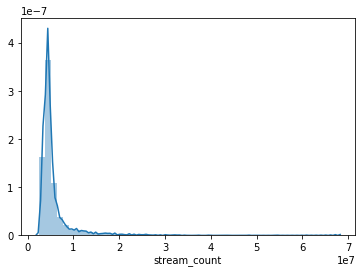

In [57]:
sns.distplot(df.stream_count);

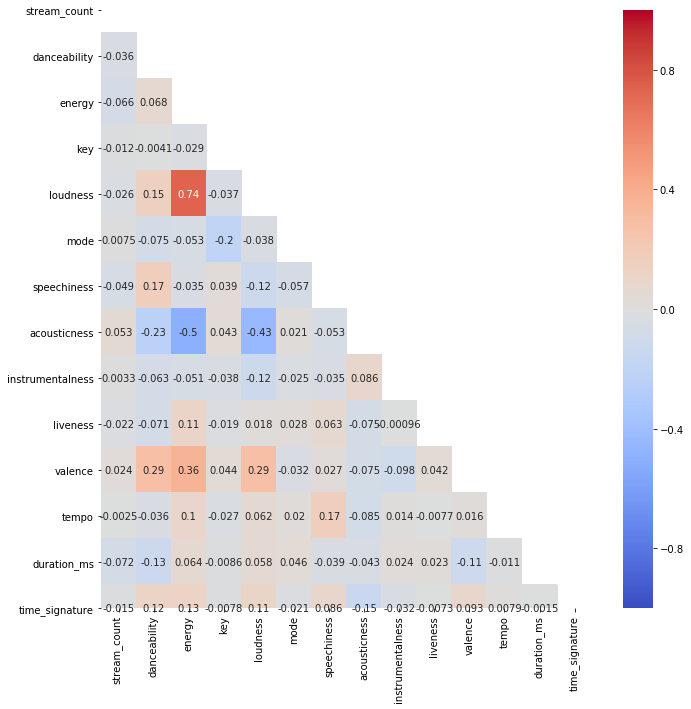

In [58]:
# Probably a good idea to choose between loudness or energy

fig, ax = plt.subplots(figsize = (11,11))

mask = np.zeros_like(df.corr(), dtype = np.bool) # returns an array of zeros with shape of df.corr
mask[np.triu_indices_from(mask)] = True # sets left side of triangle to true
sns.heatmap(df.corr(), mask = mask, cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1, ax =ax)

plt.show()

In [59]:
df2 = df[['stream_count', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

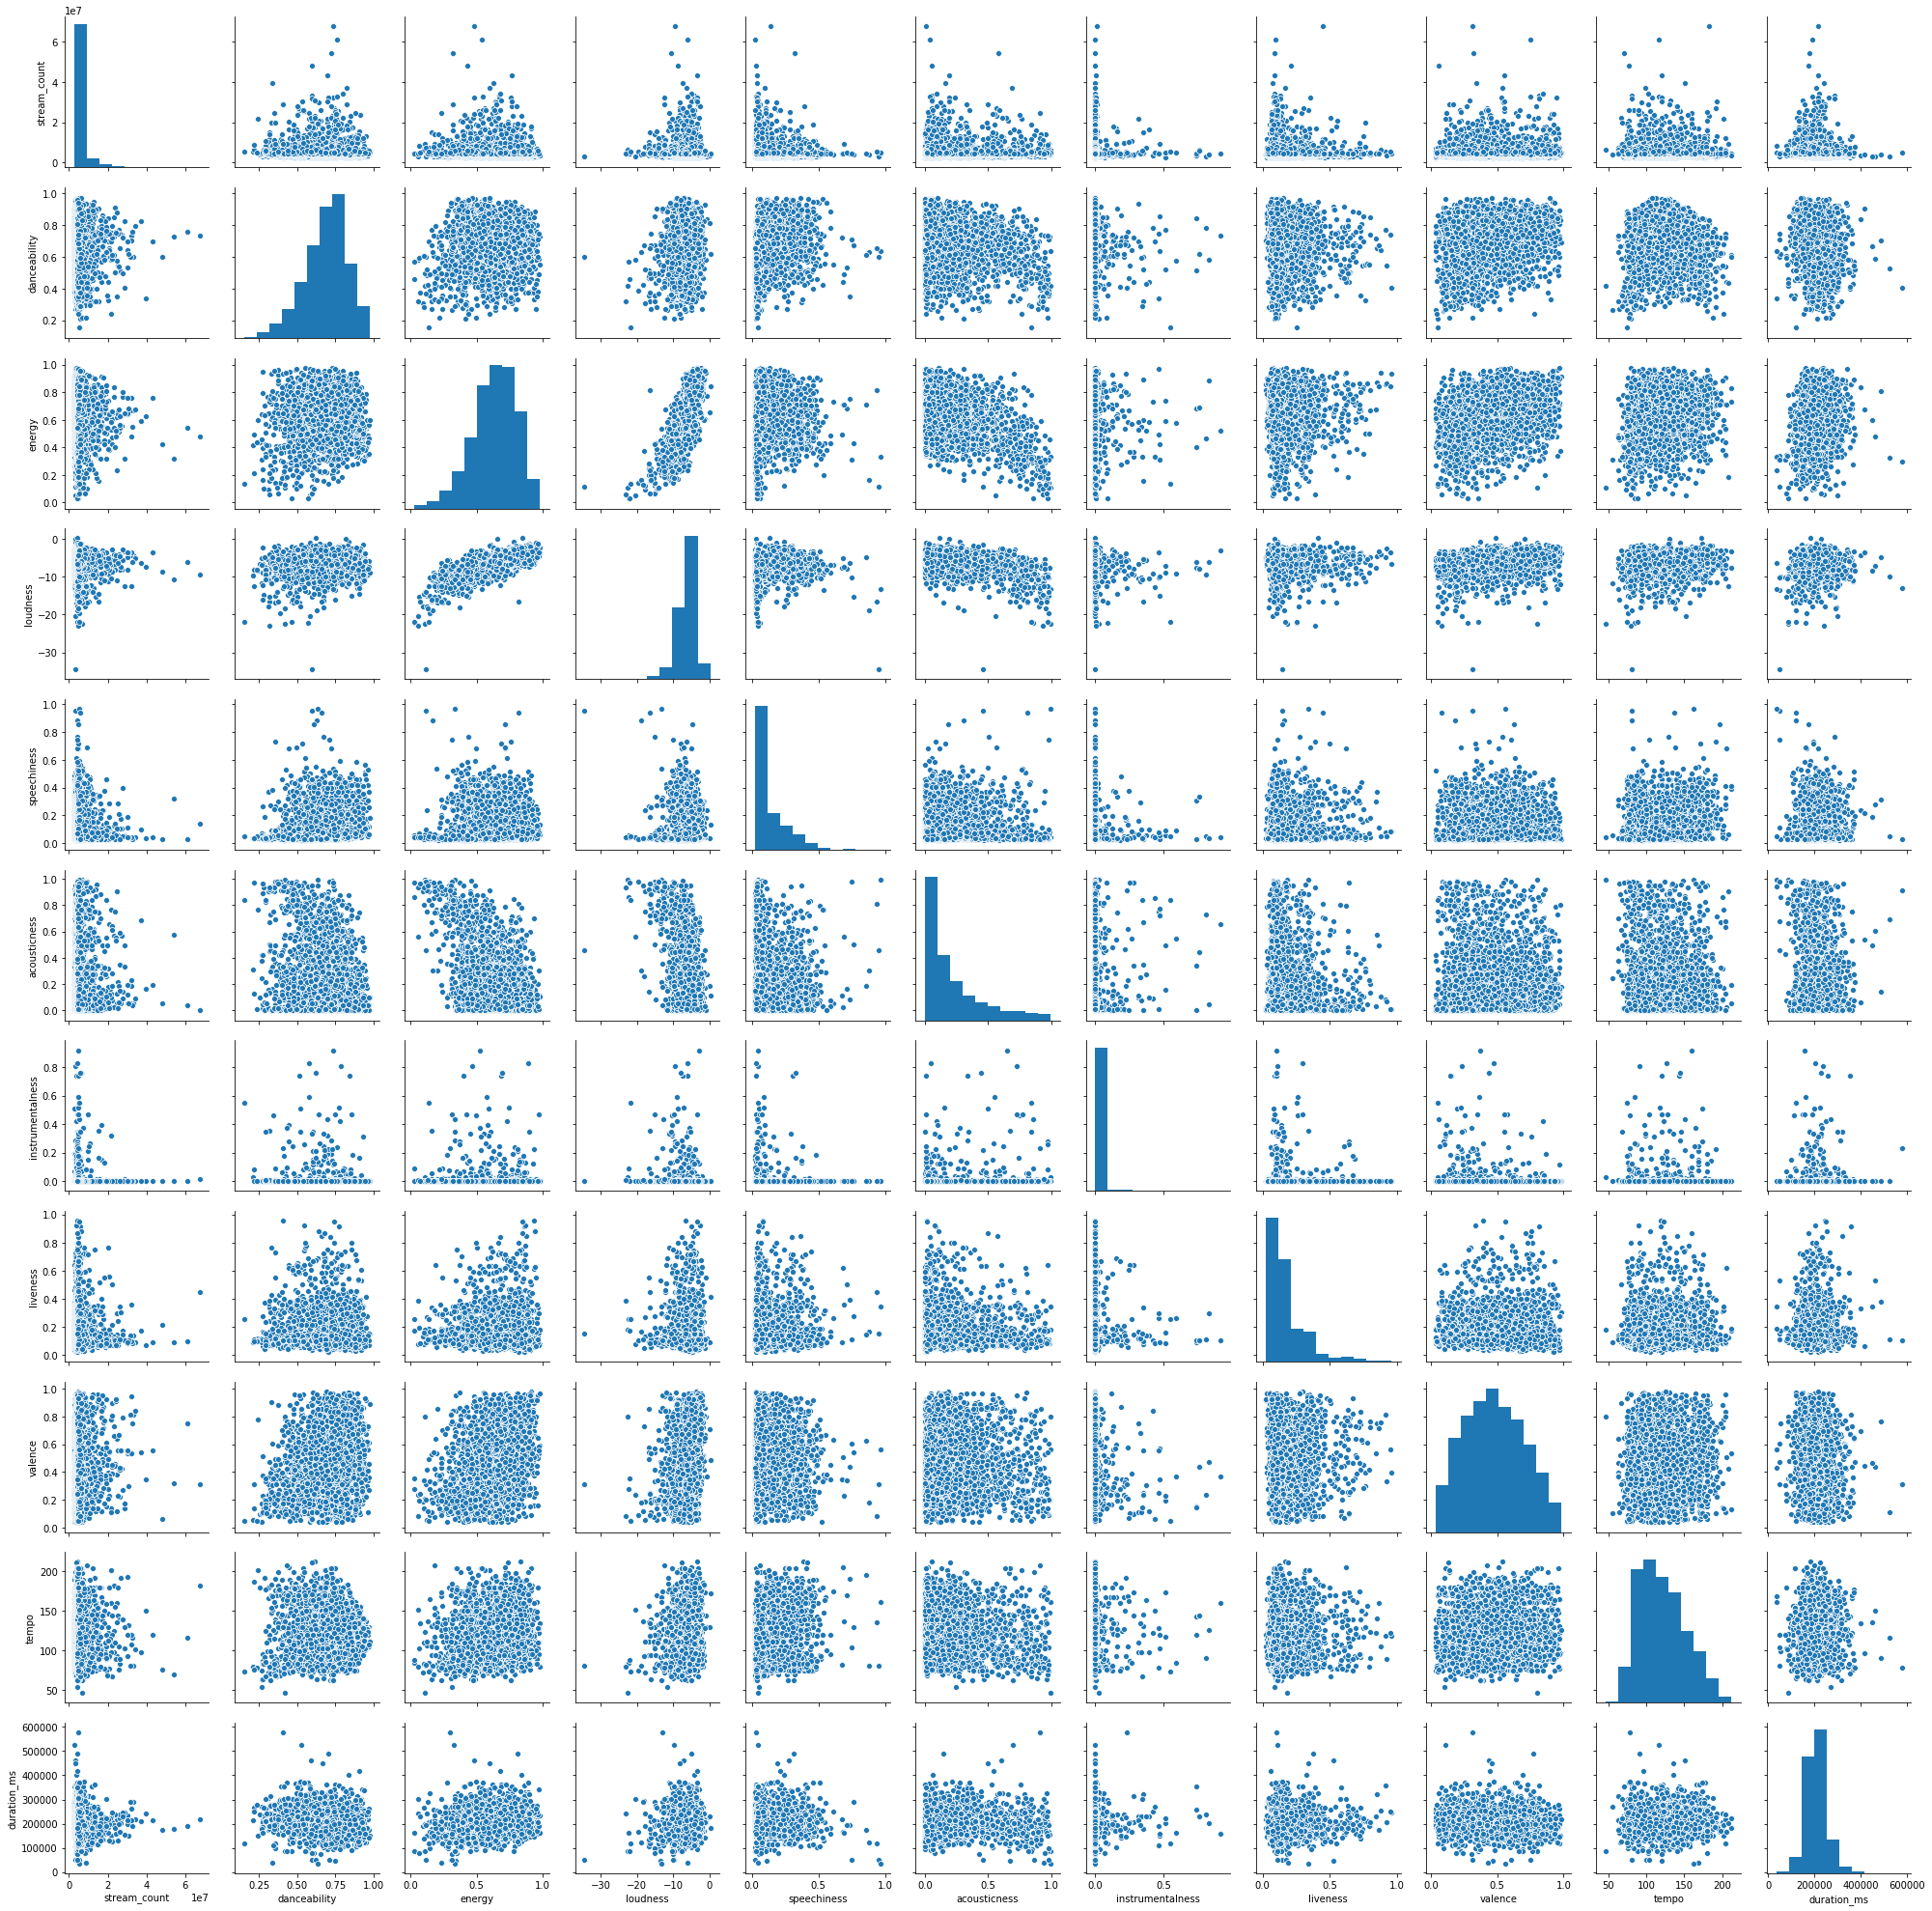

In [60]:
sns.pairplot(df2)

In [18]:
len(df2.columns)

11

In [20]:
df.head()


,stream_count,track_id,title,artist,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,15.704336,4w8niZpiMy6qz1mntFA5uM,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,0.841,0.798,1,-4.206,0,0.2290,...,0.0618,0.591,95.948,audio_features,4w8niZpiMy6qz1mntFA5uM,spotify:track:4w8niZpiMy6qz1mntFA5uM,https://api.spotify.com/v1/tracks/4w8niZpiMy6q...,https://api.spotify.com/v1/audio-analysis/4w8n...,212500,4
1,15.875424,2dpaYNEQHiRxtZbfNsse99,Happier,Marshmello,0.687,0.792,5,-2.749,1,0.0452,...,0.1670,0.671,100.015,audio_features,2dpaYNEQHiRxtZbfNsse99,spotify:track:2dpaYNEQHiRxtZbfNsse99,https://api.spotify.com/v1/tracks/2dpaYNEQHiRx...,https://api.spotify.com/v1/audio-analysis/2dpa...,214290,4
2,15.311860,4S8d14HvHb70ImctNgVzQQ,I Love It (& Lil Pump),Kanye West,0.901,0.522,2,-8.304,1,0.3300,...,0.2590,0.329,104.053,audio_features,4S8d14HvHb70ImctNgVzQQ,spotify:track:4S8d14HvHb70ImctNgVzQQ,https://api.spotify.com/v1/tracks/4S8d14HvHb70...,https://api.spotify.com/v1/audio-analysis/4S8d...,127947,4
3,16.372357,0Dn40gxVCMo5TkgS8Ik18Q,Falling Down - Bonus Track,Lil Peep,0.669,0.574,4,-6.442,0,0.0286,...,0.1460,0.273,120.013,audio_features,0Dn40gxVCMo5TkgS8Ik18Q,spotify:track:0Dn40gxVCMo5TkgS8Ik18Q,https://api.spotify.com/v1/tracks/0Dn40gxVCMo5...,https://api.spotify.com/v1/audio-analysis/0Dn4...,196400,4
4,15.269695,5N5k9nd479b1xpDZ4usjrg,Promises (with Sam Smith),Calvin Harris,0.781,0.768,11,-5.991,1,0.0394,...,0.3250,0.486,123.070,audio_features,5N5k9nd479b1xpDZ4usjrg,spotify:track:5N5k9nd479b1xpDZ4usjrg,https://api.spotify.com/v1/tracks/5N5k9nd479b1...,https://api.spotify.com/v1/audio-analysis/5N5k...,213309,4


In [28]:
for track_id in df.track_id:
    track = sp.track(track_id)
    album_uri = track['album']['uri']
    release_date = track['album']['release_date']
    album_info = sp.album(album_uri)
    print(album_info['genres'])

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


KeyboardInterrupt: 

In [92]:
import requests
import time
import random
from bs4 import BeautifulSoup 

years = [2015, 2016, 2017, 2018]

top_artists_dict = dict()

def top_artists(years):
    for year in years:
        artists_list = list()
        url = 'https://www.billboard.com/charts/year-end/'+str(year)+'/top-artists'
        #print(url)
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, 'html.parser')

        for each_artist in soup.find_all(class_ = 'ye-chart-item__title'):
            artist = each_artist.find('a')
            if artist != None:
                artists_list.append(artist.text.replace('\n', ''))
                #print(artist.text)
        
        top_artists_dict[year] = artists_list
        time.sleep(random.randint(2,8))
        print(year, 'is done')
    return top_artists_dict

In [93]:
top_artists_dict = top_artists(years)

2015 is done
2016 is done
2017 is done
2018 is done


In [96]:
top_artists_dict[2015]

['Taylor Swift',
 'Ed Sheeran',
 'The Weeknd',
 'Drake',
 'One Direction',
 'Maroon 5',
 'Meghan Trainor',
 'Fetty Wap',
 'Sam Smith ',
 'Nicki Minaj',
 'Ariana Grande',
 'Selena Gomez',
 'Mark Ronson',
 'Luke Bryan',
 'Justin Bieber',
 'Wiz Khalifa',
 'WALK THE MOON',
 'Hozier',
 'Fall Out Boy',
 'Ellie Goulding',
 'Katy Perry',
 'Kenny Chesney',
 'Sam Hunt',
 'Beyonce',
 'J. Cole',
 'Rihanna',
 'Nick Jonas',
 'Jason Derulo',
 'Florida Georgia Line',
 'Bruno Mars',
 'Silento',
 'The Rolling Stones',
 'OMI',
 'U2',
 'Tove Lo',
 'Demi Lovato',
 'Kendrick Lamar',
 'Chris Brown',
 'Future',
 'Big Sean',
 'Rae Sremmurd',
 '5 Seconds Of Summer',
 'Eric Church',
 'Blake Shelton',
 'Shawn Mendes',
 'Sia',
 'Zac Brown Band',
 'Jason Aldean',
 'Imagine Dragons',
 'Rachel Platten',
 'Carrie Underwood',
 'Fifth Harmony',
 'Andy Grammer',
 'Pitbull',
 'Pentatonix',
 'Fleetwood Mac',
 'Meek Mill',
 'David Guetta',
 'Charlie Puth',
 'Adele',
 'Justin Timberlake',
 'Iggy Azalea',
 'Eminem',
 'Foo Fig

NameError: name 'year_2015' is not defined